### __スペクトログラムの3通りの作成方法__

### __準備__

In [1]:
!pip install pyroomacoustics --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import wave
import pyroomacoustics as pra

# サンプルデータのダウンロード
# 男性話者aew
pra.datasets.CMUArcticCorpus(download=True, speaker=["aew"])

file_name="CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

In [11]:
wav=wave.open(file_name)
data = wav.readframes(wav.getnframes())
data = np.frombuffer(data, dtype=np.int16)
sampling_rate = wav.getframerate()
wav.close()

data

array([29, 34, 38, ..., -3, -1,  0], dtype=int16)

### __短時間フーリエ変換とは__

- STFT (Short-Time Fourier Transform)

- 窓関数をずらしながらフーリエ変換を適用
    
    - 窓関数が重複することで、振幅の変化を連続的に捉えられるが、重複が大きすぎると計算量が増えてしまう
    
    - オーバーラップは窓関数の幅の1/2〜3/4にするのが一般的
    
    - 窓の幅
    
        - matplotlibでは`NFFT`に指定
    
        - scipyでは`nperseg`に指定
    
    - 窓関数の重なり
    
        - `noverlap`に指定

    - 代表的な窓関数

        - ハニング窓(ハン窓)

        - ハミング窓

### __1. matplotlibを使った方法__

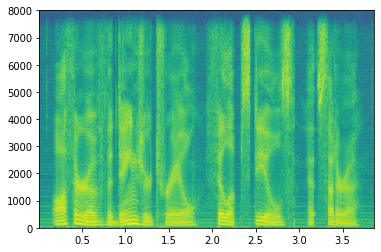

In [4]:
# 返り値は「解析結果の2次元配列、周波数、時間、画像インスタンス」
plt.specgram(
    data,
    Fs=sampling_rate, # サンプリング周波数 (default: 2)
    NFFT=512, # 窓関数の幅
    noverlap=512/2, # 重複幅
)
plt.show()

### __2. scipyを使った方法__

In [6]:
# STFT
# 周波数、時間、解析結果が返る

frequency, time, stft_data = scipy.signal.stft(
                                              data,
                                              fs=sampling_rate, # サンプリング周波数
                                              nperseg=512, # 窓関数の幅
                                              noverlap=512/2 # 重複幅
                                             )

In [13]:
stft_data = 20 * np.log10(np.abs(stft_data)) # dBに変換
stft_data

array([[17.512228 , 28.9944   , 27.622149 , ..., 19.260574 , 26.982246 ,
        17.852955 ],
       [22.391842 , 28.900969 , 27.365086 , ..., 25.635342 , 27.68918  ,
        15.224461 ],
       [25.722744 , 28.75247  , 28.092453 , ..., 27.346115 , 27.894913 ,
         7.0845437],
       ...,
       [27.51671  , 31.392126 , 30.09475  , ..., 30.278034 , 31.418371 ,
        33.529984 ],
       [27.571064 , 29.716623 , 30.036812 , ..., 28.784962 , 28.121487 ,
        34.148506 ],
       [27.500118 , 29.596382 , 29.976452 , ..., 31.241673 , 26.999445 ,
        34.64866  ]], dtype=float32)

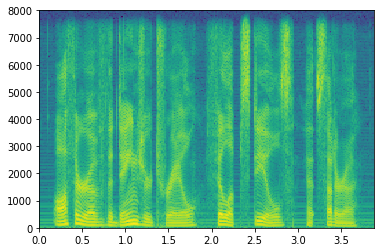

In [8]:
plt.pcolormesh(time, frequency, stft_data)
plt.show()

### __3. numpyを使った方法__

- フーリエ変換〜もともと連続値（アナログ値）を解析する手法

- 離散フーリエ変換（Discrete Fourier Transform、DFT）〜離散版のフーリエ変換

- 高速フーリエ変換（Fast Fourier Transform, FFT）〜DFTの高速版

numpyではFFTを計算する関数が用意されている。

numpyで短時間フーリエ変換を行いたい時は、自分で窓関数やオーバーラップを実装した上で、forループでFFTを実行する必要がある。

In [ ]:
# FFT

fft_data = np.fft.fft(data)
fft_data

array([8532.        -2.91038305e-11j, 7065.03077118-2.94999766e+02j,
       7493.34059516+4.72415824e+02j, ..., 6344.70498509-3.09731954e+02j,
       7493.34059516-4.72415824e+02j, 7065.03077118+2.94999766e+02j])

### __短時間逆フーリエ変換__

In [24]:
time, data_post = scipy.signal.istft(
                              stft_data,
                              fs=sampling_rate, # サンプリング周波数
                              nperseg=512, # 窓関数の幅
                              noverlap=512/2 # 重複幅
                             )